In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Data Loading and Preprocessing

In [2]:
df = pd.read_csv(os.path.join("census", "census-income.data"))
test_df = pd.read_csv(os.path.join("census", "census-income.test"))

# instance weight is ignored
df.drop(df.columns[24], axis=1, inplace=True)
test_df.drop(df.columns[24], axis=1, inplace=True)

In [3]:
column_names = {
    "age": "continuous",
    "class of worker": "categorical",
    "detailed industry recode": "categorical",
    "detailed occupation recode": "categorical",
    "education": "categorical",
    "wage per hour": "continuous",
    "enroll in edu inst last wk": "categorical",
    "marital stat": "categorical",
    "major industry code": "categorical",
    "major occupation code": "categorical",
    "race": "categorical",
    "hispanic origin": "categorical",
    "sex": "categorical",
    "member of a labor union": "categorical",
    "reason for unemployment": "categorical",
    "full or part time employment stat": "categorical",
    "capital gains": "continuous",
    "capital losses": "continuous",
    "dividends from stocks": "continuous",
    "tax filer stat": "categorical",
    "region of previous residence": "categorical",
    "state of previous residence": "categorical",
    "detailed household and family stat": "categorical",
    "detailed household summary in household": "categorical",
    # "instance weight": "continuous",
    "migration code-change in msa": "categorical",
    "migration code-change in reg": "categorical",
    "migration code-move within reg": "categorical",
    "lived in house one year ago": "categorical",
    "migration prev res in sunbelt": "categorical",
    "num persons worked for employer": "continuous",
    "family members under 18": "categorical",
    "country of birth father": "categorical",
    "country of birth mother": "categorical",
    "country of birth self": "categorical",
    "citizenship": "categorical",
    "own business or self employed": "categorical",
    "fill inc questionnaire for veteran's admin": "categorical",
    "veterans benefits": "categorical",
    "weeks worked in year": "continuous",
    "year": "categorical",
    "income": "target"
}
continuous_col = [k for k, v in column_names.items() if v == 'continuous']
categorical_col = [k for k, v in column_names.items() if v == 'categorical']

# add column names
df.columns = column_names.keys()
test_df.columns = column_names.keys()

In [4]:
def preprocess(df):
    # remove duplicates and assign most common target value
    feature_columns = df.columns.difference(['income'])
    df = df.groupby(feature_columns.to_list())['income'].agg(lambda x: x.mode()[0]).reset_index()

    # find columns with missing values
    missing_val_col = [x for x in column_names.keys() if ' ?' in df[x].values]

    # set missing values to mode
    for col in missing_val_col:
        df[col] = df[col].replace(' ?', df[col].mode()[0])

    # one hot encoding for categorical features
    df = pd.get_dummies(df, columns=categorical_col, dtype=int)

    return df

In [5]:
df = preprocess(df)
test_df = preprocess(test_df)

df.head()

,age,capital gains,capital losses,dividends from stocks,num persons worked for employer,wage per hour,weeks worked in year,income,class of worker_ Federal government,class of worker_ Local government,...,own business or self employed_1,own business or self employed_2,fill inc questionnaire for veteran's admin_ No,fill inc questionnaire for veteran's admin_ Not in universe,fill inc questionnaire for veteran's admin_ Yes,veterans benefits_0,veterans benefits_1,veterans benefits_2,year_94,year_95
0,0,0,0,0,0,0,0,- 50000.,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,0,0,0,- 50000.,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,- 50000.,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,0,0,- 50000.,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,- 50000.,0,0,...,0,0,0,1,0,1,0,0,1,0


### Splitting the Data and Training the Model

In [6]:
# get input and output values for train and validation sets
X = df.drop(columns=['income'])
y = df['income']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1234)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((106964, 506), (45843, 506), (106964,), (45843,))

In [7]:
# train model 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train);

In [8]:
# evaluate model on validation set
y_pred = model.predict(X_val)

acc = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
print(f'Accuracy: {round(acc * 100, 2)}\n{report}')

Accuracy: 92.9
              precision    recall  f1-score   support

    - 50000.       0.93      1.00      0.96     42137
     50000+.       0.79      0.17      0.27      3706

    accuracy                           0.93     45843
   macro avg       0.86      0.58      0.62     45843
weighted avg       0.92      0.93      0.91     45843



### Visualizing the Decision Tree

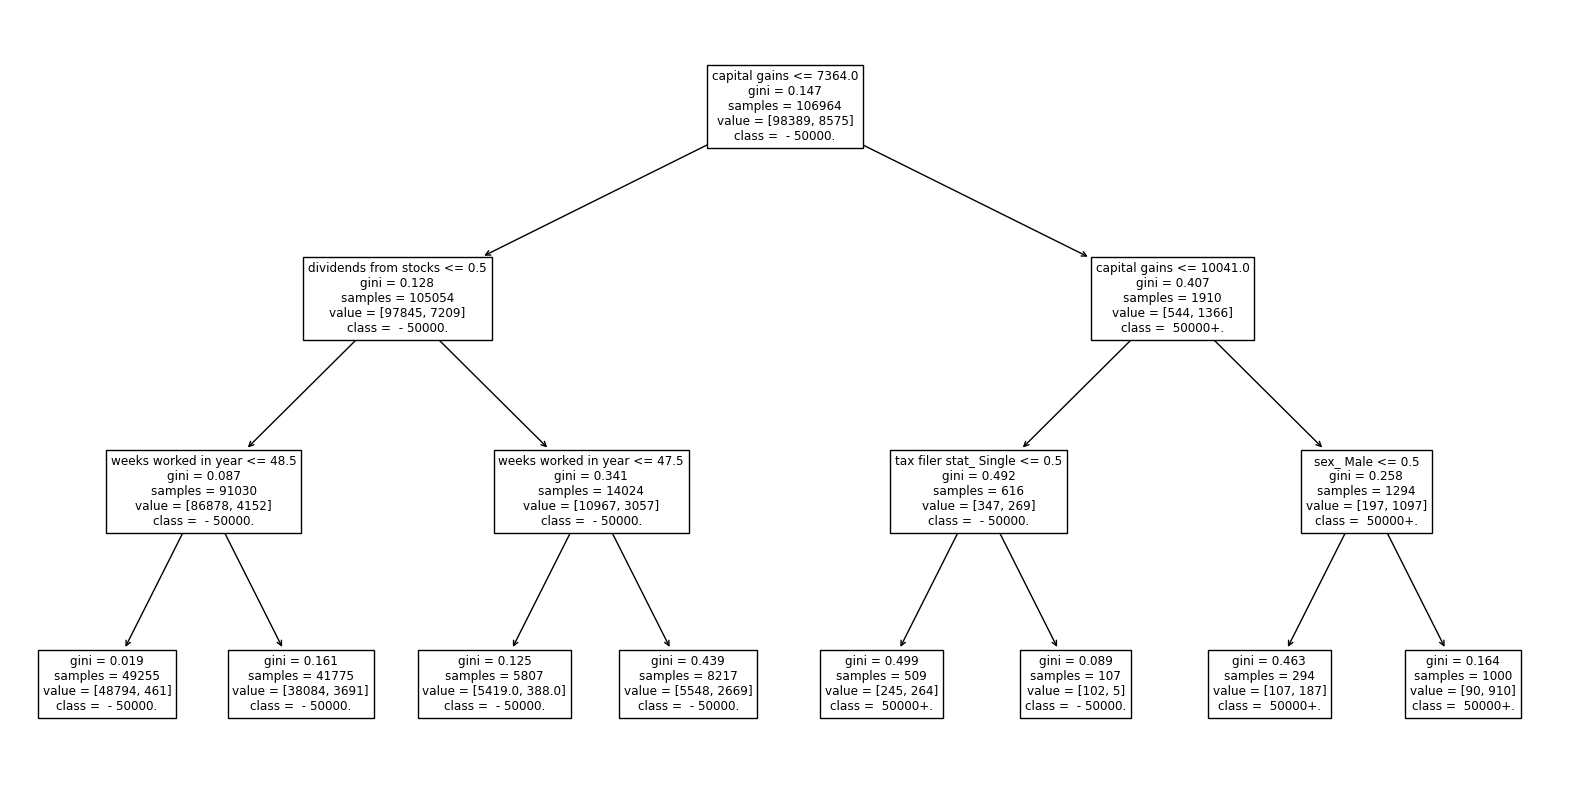

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=df['income'].unique());

### Feature Importance

In [ ]:
# extract all features that affect prediction
importance_scores = model.feature_importances_
non_zero_feature_scores = {k: v for k, v in zip(X.columns, importance_scores) if v != 0}
non_zero_feature_scores

{'capital gains': 0.5275886006037621,
 'dividends from stocks': 0.22286831045770383,
 'weeks worked in year': 0.22686330930114196,
 'sex_ Male': 0.010524756715387423,
 'tax filer stat_ Single': 0.012155022922004783}

Feature importance measures how much a feature contributed to reducing impurity in the decision tree. A feature is more important when it has a stronger correlation with the target class, which creates a clearer decision boundary. For example, capital gains accounted for 52.76% of the impurity reduction. At the root node, the tree splits on capital gains at 7364. The subset with capital gains less than or equal to 7364 had 97845 samples in the -50000 income class and 7209 in 50000+, while capital gains more than 7364 had 544 in -50000 and 1366 in 50000+, making it the most influential feature and split.

### Evaluation on the Test Set

In [11]:
# get input and output values for test set
X_test = df.drop(columns=['income'])
y_test = df['income']

X_test.shape, y_test.shape

((152807, 506), (152807,))

In [12]:
# evaluate model on test set
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {round(acc * 100, 2)}\n{report}')

Accuracy: 92.86
              precision    recall  f1-score   support

    - 50000.       0.93      1.00      0.96    140526
     50000+.       0.77      0.16      0.27     12281

    accuracy                           0.93    152807
   macro avg       0.85      0.58      0.61    152807
weighted avg       0.92      0.93      0.91    152807

